In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [38]:
df = pd.read_csv('../data/raw_data/creditcard.csv')

In [39]:
print(df.head())

   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    40000 non-null  float64
 1   V1      40000 non-null  float64
 2   V2      40000 non-null  float64
 3   V3      40000 non-null  float64
 4   V4      40000 non-null  float64
 5   V5      40000 non-null  float64
 6   V6      40000 non-null  float64
 7   V7      40000 non-null  float64
 8   V8      40000 non-null  float64
 9   V9      40000 non-null  float64
 10  V10     40000 non-null  float64
 11  V11     40000 non-null  float64
 12  V12     40000 non-null  float64
 13  V13     40000 non-null  float64
 14  V14     40000 non-null  float64
 15  V15     40000 non-null  float64
 16  V16     40000 non-null  float64
 17  V17     40000 non-null  float64
 18  V18     40000 non-null  float64
 19  V19     40000 non-null  float64
 20  V20     40000 non-null  float64
 21  V21     40000 non-null  float64
 22

In [41]:
print("Shape of the Dataset:", df.shape)
print("Class Categories:", df['Class'].unique())
print("Number of Records with the class Value 0:", (df.Class == 0).sum())
print("Number of Records with class Value 1:", (df.Class == 1).sum())

Shape of the Dataset: (40000, 31)
Class Categories: [0 1]
Number of Records with the class Value 0: 39896
Number of Records with class Value 1: 104


<Axes: xlabel='Class', ylabel='count'>

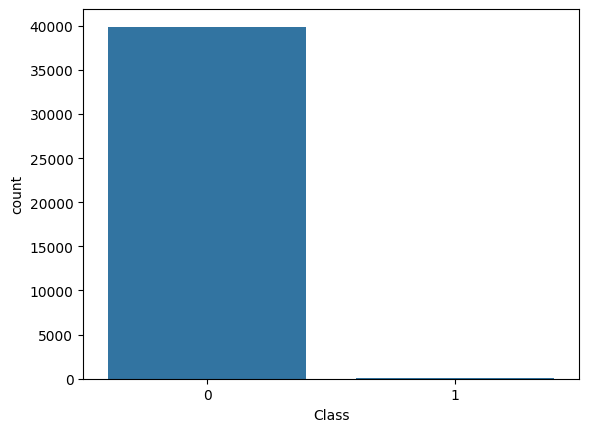

In [42]:
sns.countplot(x="Class", data=df)

In [43]:
x = df.corr()['Class'][:30]
x

Time     -0.02
V1       -0.21
V2        0.18
V3       -0.39
V4        0.21
V5       -0.19
V6       -0.09
V7       -0.31
V8        0.16
V9       -0.13
V10      -0.30
V11       0.23
V12      -0.29
V13       0.01
V14      -0.38
V15      -0.01
V16      -0.27
V17      -0.40
V18      -0.16
V19       0.03
V20       0.05
V21       0.04
V22      -0.02
V23      -0.03
V24      -0.02
V25       0.02
V26       0.02
V27       0.11
V28       0.01
Amount    0.00
Name: Class, dtype: float64

<Axes: title={'center': 'Corelation of features with Target Variable'}>

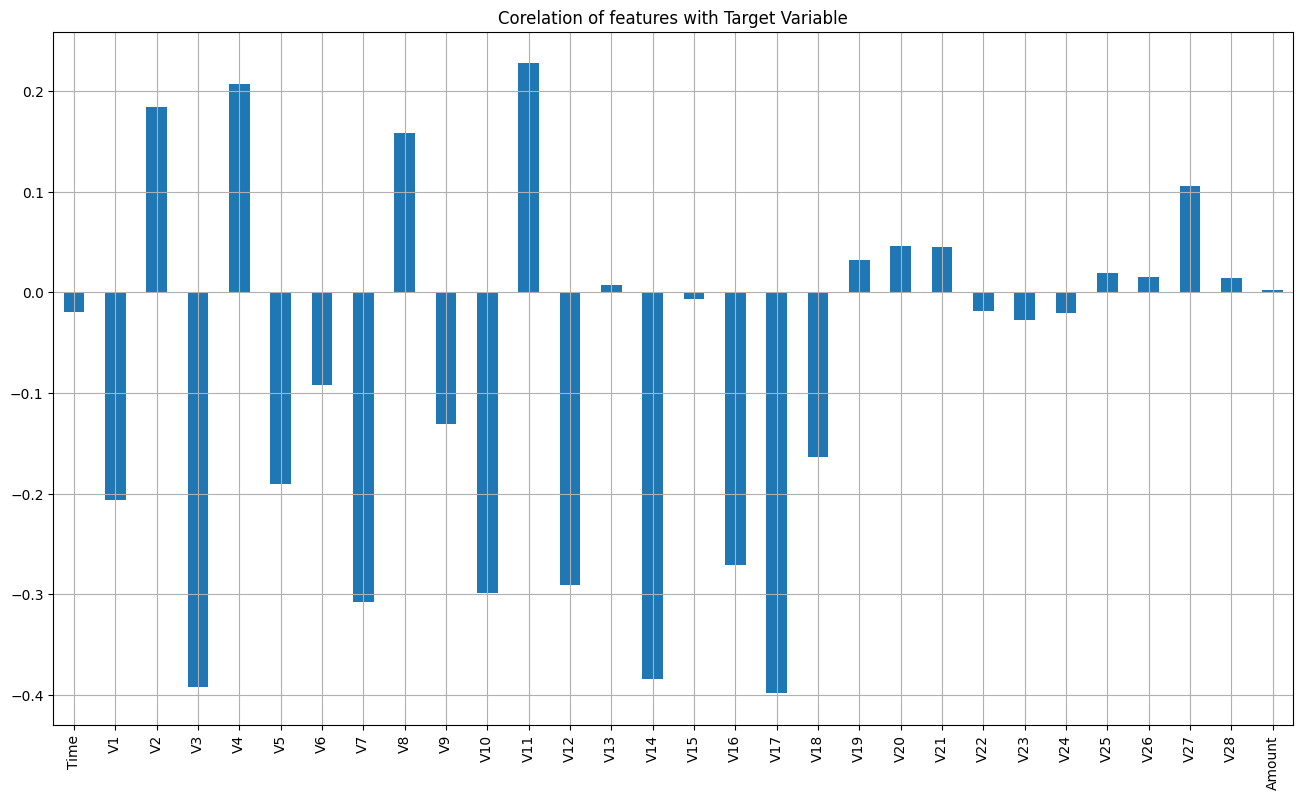

In [44]:
x = df.corr()['Class'][:30]
x.plot.bar(figsize=(16,9), title="Corelation of features with Target Variable", grid=True)

<Axes: >

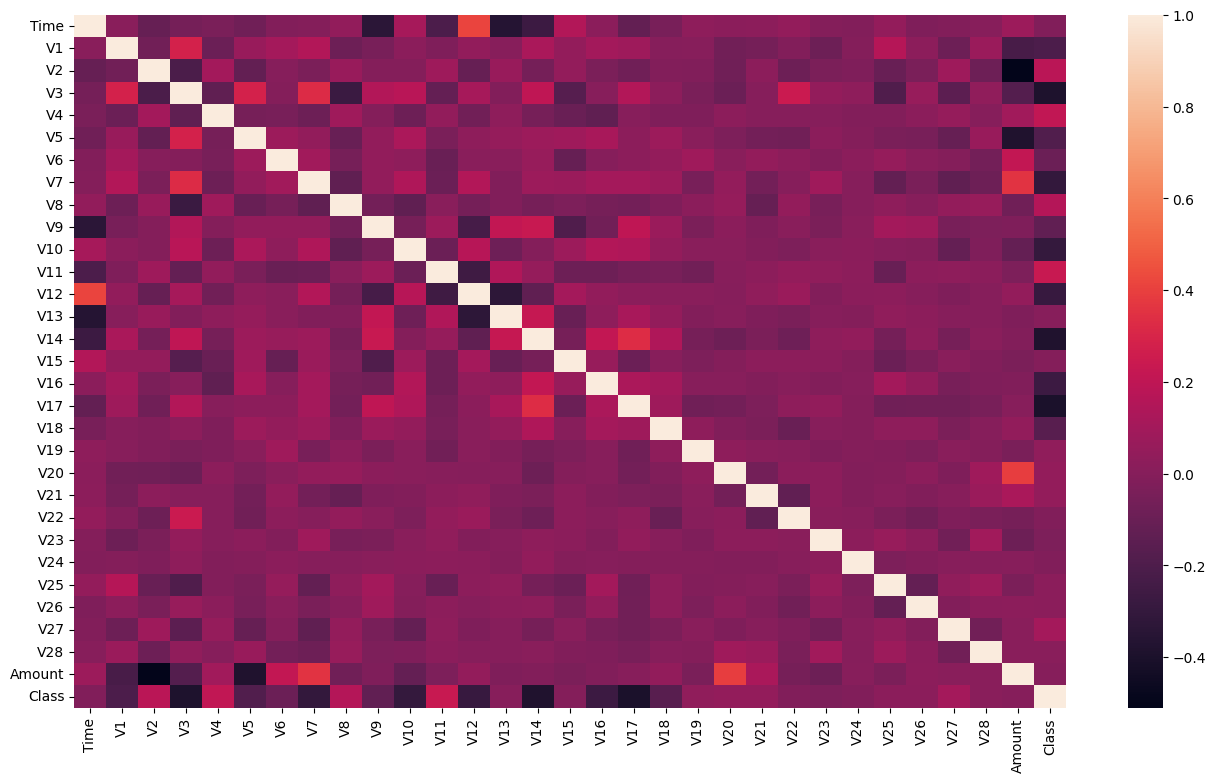

In [45]:
plt.figure(figsize=(16,9))

sns.heatmap(df.corr())

In [46]:
y = df.corr()['Class']

df2 = df.copy()

for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)

In [47]:
df2.head()

V1    V2   V3    V4    V5    V7    V8    V9   V10   V11   V12   V14  \
0 -1.36 -0.07 2.54  1.38 -0.34  0.24  0.10  0.36  0.09 -0.55 -0.62 -0.31   
1  1.19  0.27 0.17  0.45  0.06 -0.08  0.09 -0.26 -0.17  1.61  1.07 -0.14   
2 -1.36 -1.34 1.77  0.38 -0.50  0.79  0.25 -1.51  0.21  0.62  0.07 -0.17   
3 -0.97 -0.19 1.79 -0.86 -0.01  0.24  0.38 -1.39 -0.05 -0.23  0.18 -0.29   
4 -1.16  0.88 1.55  0.40 -0.41  0.59 -0.27  0.82  0.75 -0.82  0.54 -1.12   

    V16   V17   V18  Class  
0 -0.47  0.21  0.03      0  
1  0.46 -0.11 -0.18      0  
2 -2.89  1.11 -0.12      0  
3 -1.06 -0.68  1.97      0  
4 -0.45 -0.24 -0.04      0

<Axes: >

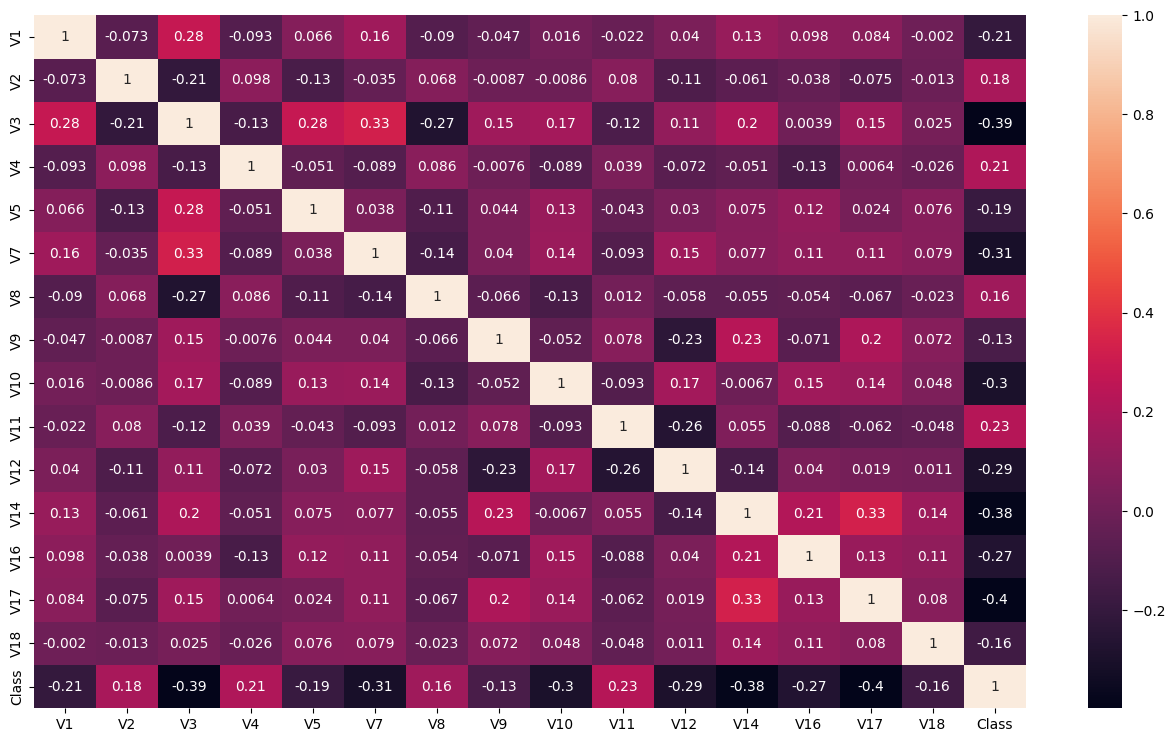

In [48]:
plt.figure(figsize=(16, 9))

sns.heatmap(df2.corr(), annot=True)

<Axes: title={'center': 'Top Correlated Features with the Target Variable'}>

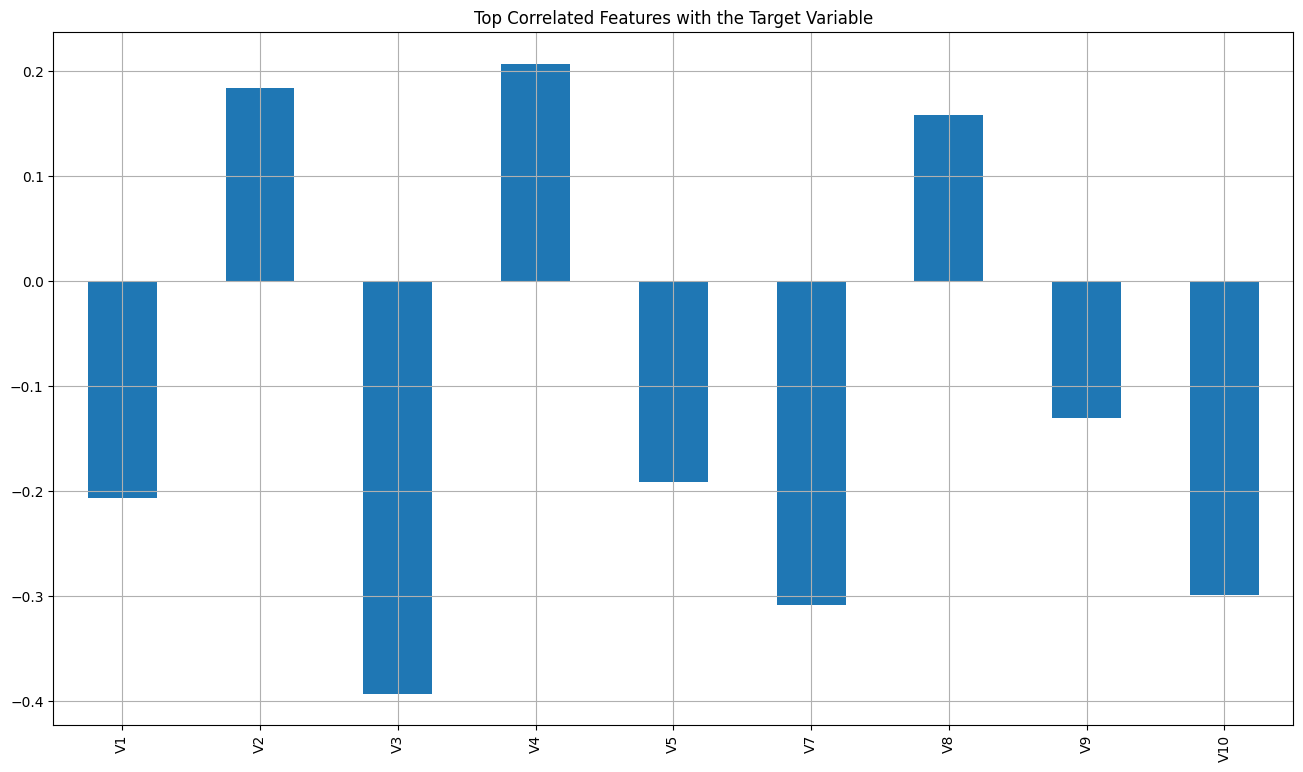

In [49]:
x = df2.corr()['Class'][:9]
x.plot.bar(figsize=(16,9), title = "Top Correlated Features with the Target Variable", grid = True)

In [50]:
from imblearn.under_sampling import RandomUnderSampler

X = df2.drop('Class', axis = 1)
y = df2['Class']

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns = ['Class'])], axis=1)

downsampled_df.head()

V1    V2   V3    V4    V5    V7    V8    V9   V10   V11   V12   V14  \
0  1.17  0.13 0.08  0.48 -0.45  0.43 -0.52  1.11 -0.48  1.17 -2.22  1.98   
1 -0.05 -0.04 0.36 -2.28  2.00 -0.24  0.57 -0.09  0.03  0.93 -3.61  1.10   
2 -0.97  0.99 0.83  0.25  3.00  0.60  0.49 -0.44  0.72 -0.70 -0.52 -0.66   
3 -1.05  0.31 1.58  0.23 -3.18  2.16 -0.30  0.48 -0.76 -0.24  0.21 -0.74   
4 -0.63  0.84 1.42 -0.11  0.85  0.58  0.24 -0.23 -0.38  1.15  0.35 -0.55   

    V16   V17   V18  Class  
0 -0.27  0.77 -0.57      0  
1  1.35  0.36 -0.71      0  
2  0.56 -1.22 -0.22      0  
3 -0.78  0.81 -0.92      0  
4 -1.07  1.21 -2.23      0

In [51]:
downsampled_df.shape

(208, 16)

<Axes: xlabel='Class', ylabel='count'>

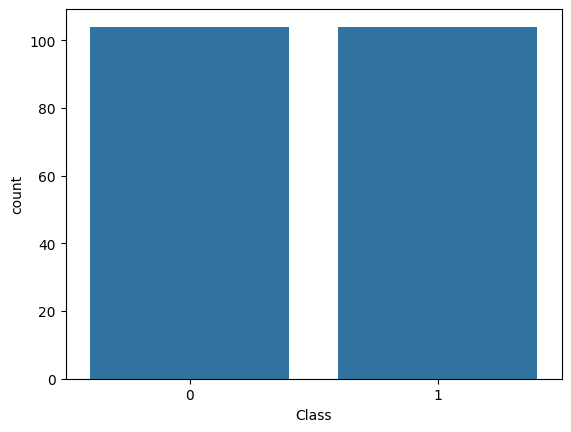

In [52]:
sns.countplot(x='Class', data = downsampled_df)

<Axes: xlabel='V11', ylabel='V17'>

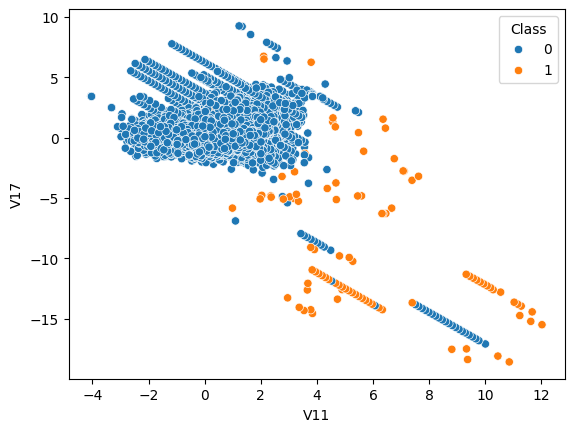

In [53]:
sns.scatterplot(x='V11', y="V17", hue='Class', data=df2)

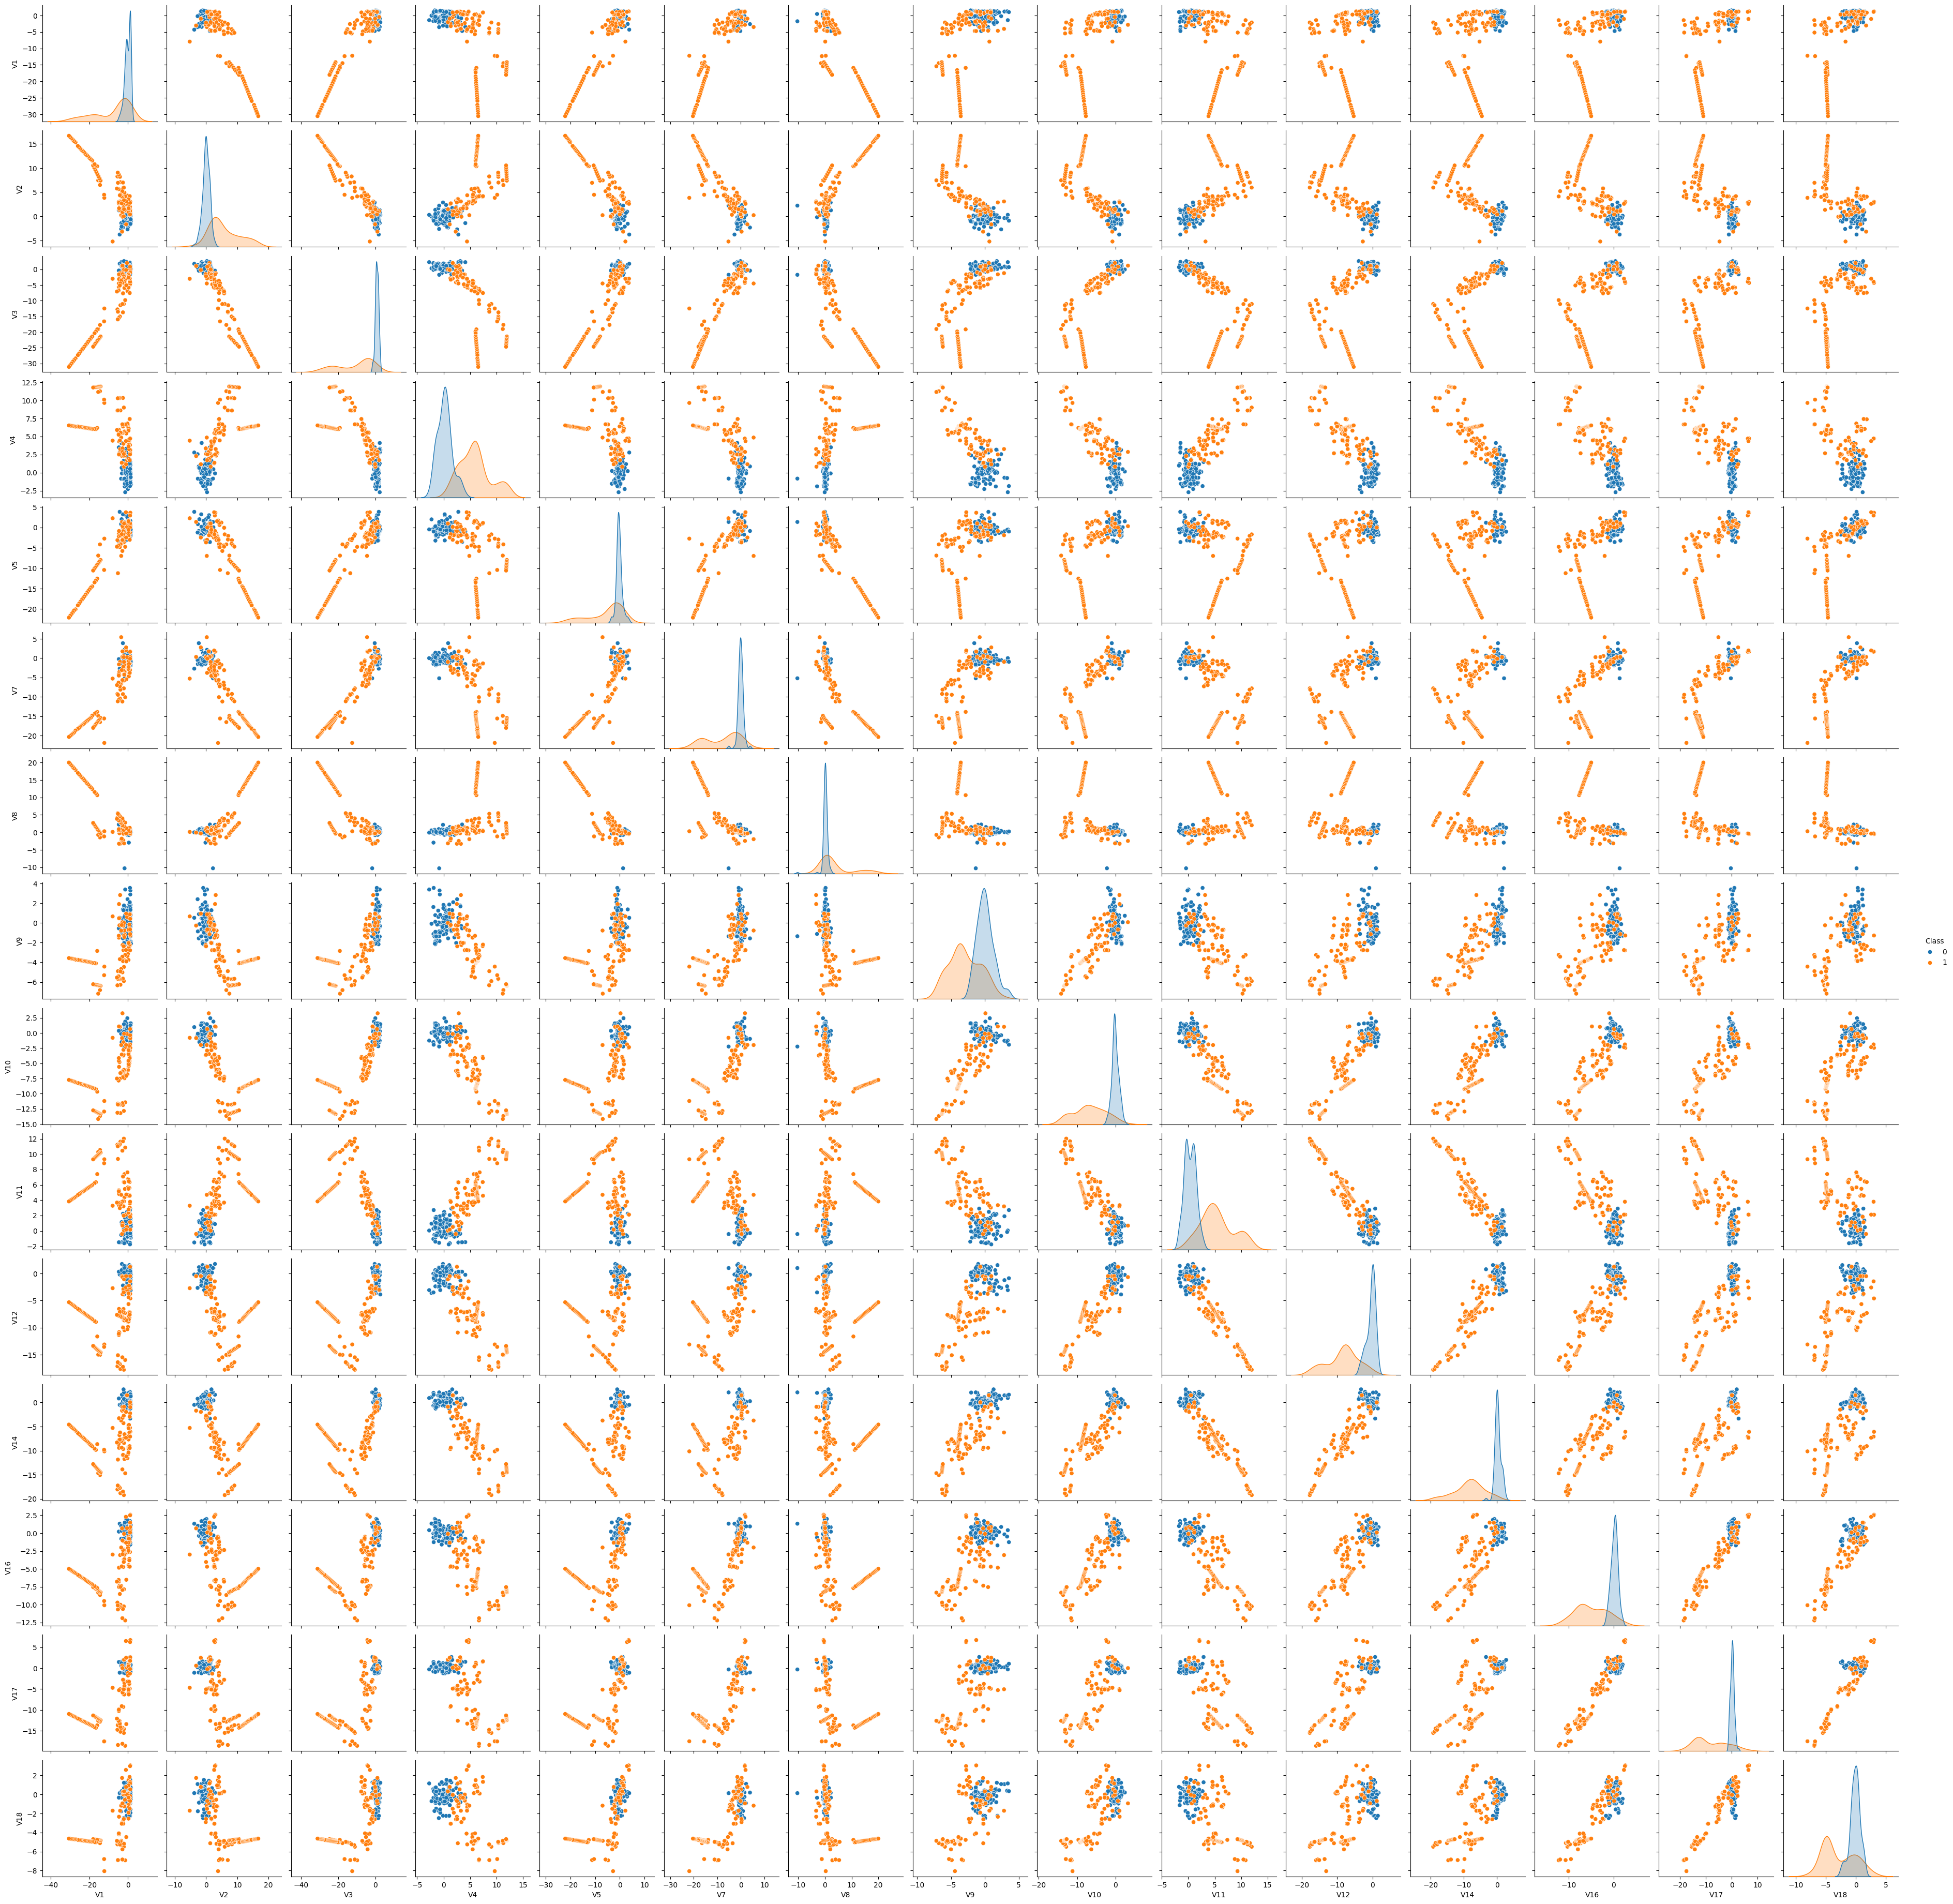

In [54]:
import warnings 

warnings.filterwarnings("ignore")
sns.pairplot(downsampled_df, hue='Class')

In [55]:
df2.to_csv("../data/processed/processed_data.csv", index=False)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample 
from sklearn.metrics import classification_report, confusion_matrix

X = df2.drop(columns='Class')
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_data = X_train.copy()
train_data['Class'] = y_train

majority_class = train_data[train_data['Class'] == 0] 
minority_class = train_data[train_data['Class'] == 1]

majority_downsampled = resample(majority_class,
                                      replace = False,
                                      n_samples = len(minority_class),
                                      random_state = 42)

downsampled_train_data = pd.concat([majority_downsampled, minority_class])

X_train_downsampled = downsampled_train_data.drop(columns='Class')
y_train_downsampled = downsampled_train_data['Class']


In [57]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [58]:
from lazypredict.Supervised import LazyClassifier
from tqdm import tqdm

# force LazyPredict to use text progress bar instead of notebook progress bar
import lazypredict.Supervised as lp
lp.notebook_tqdm = tqdm

clf = LazyClassifier(random_state=42, verbose=1)

models, predictions = clf.fit(
    X_train_downsampled, X_test,
    y_train_downsampled, y_test
)

models


  3%|▎         | 1/29 [00:00<00:03,  9.27it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.986875, 'Balanced Accuracy': 0.9696733687835329, 'ROC AUC': 0.9696733687835329, 'F1 Score': 0.9914940054807033, 'Time taken': 0.10770082473754883}
{'Model': 'BaggingClassifier', 'Accuracy': 0.9675, 'Balanced Accuracy': 0.9599603721674157, 'ROC AUC': 0.9599603721674157, 'F1 Score': 0.9812079617834396, 'Time taken': 0.036070823669433594}
{'Model': 'BernoulliNB', 'Accuracy': 0.995, 'Balanced Accuracy': 0.9262528422824199, 'ROC AUC': 0.92625284228242, 'F1 Score': 0.9961130831978213, 'Time taken': 0.014885663986206055}


 14%|█▍        | 4/29 [00:00<00:01, 20.48it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.986375, 'Balanced Accuracy': 0.9694227108063428, 'ROC AUC': 0.9694227108063427, 'F1 Score': 0.9912212111403215, 'Time taken': 0.05292654037475586}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.956125, 'Balanced Accuracy': 0.9542579031863403, 'ROC AUC': 0.9542579031863403, 'F1 Score': 0.9752155439292599, 'Time taken': 0.024105310440063477}
{'Model': 'DummyClassifier', 'Accuracy': 0.997375, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9960642249202079, 'Time taken': 0.019791603088378906}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.86325, 'Balanced Accuracy': 0.8364576059775959, 'ROC AUC': 0.836457605977596, 'F1 Score': 0.9240861657777575, 'Time taken': 0.024195194244384766}


 31%|███       | 9/29 [00:00<00:00, 21.92it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.98425, 'Balanced Accuracy': 0.9683574144032847, 'ROC AUC': 0.9683574144032847, 'F1 Score': 0.9900708590329486, 'Time taken': 0.12704801559448242}
{'Model': 'GaussianNB', 'Accuracy': 0.987125, 'Balanced Accuracy': 0.9460518384569018, 'ROC AUC': 0.9460518384569017, 'F1 Score': 0.991604760636621, 'Time taken': 0.01681685447692871}


 52%|█████▏    | 15/29 [00:00<00:00, 18.04it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.983, 'Balanced Accuracy': 0.9677307694603094, 'ROC AUC': 0.9677307694603093, 'F1 Score': 0.989399611637099, 'Time taken': 0.24725747108459473}
{'Model': 'LabelPropagation', 'Accuracy': 0.9635, 'Balanced Accuracy': 0.9579551083498946, 'ROC AUC': 0.9579551083498946, 'F1 Score': 0.979103474659424, 'Time taken': 0.03801536560058594}
{'Model': 'LabelSpreading', 'Accuracy': 0.96425, 'Balanced Accuracy': 0.9583310953156798, 'ROC AUC': 0.95833109531568, 'F1 Score': 0.9794982055782269, 'Time taken': 0.04724740982055664}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.98575, 'Balanced Accuracy': 0.9216156697044027, 'ROC AUC': 0.9216156697044027, 'F1 Score': 0.9908314511041009, 'Time taken': 0.02911543846130371}
{'Model': 'LinearSVC', 'Accuracy': 0.9715, 'Balanced Accuracy': 0.9619656359849367, 'ROC AUC': 0.9619656359849366, 'F1 Score': 0.9833120808998486, 'Time taken': 0.02907848358154297}


 62%|██████▏   | 18/29 [00:01<00:00, 15.62it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.993, 'Balanced Accuracy': 0.972743929004112, 'ROC AUC': 0.9727439290041119, 'F1 Score': 0.9949568661971832, 'Time taken': 0.12699413299560547}
{'Model': 'NearestCentroid', 'Accuracy': 0.997875, 'Balanced Accuracy': 0.832706688390358, 'ROC AUC': 0.8327066883903579, 'F1 Score': 0.9979456335527002, 'Time taken': 0.02233433723449707}
{'Model': 'NuSVC', 'Accuracy': 0.995875, 'Balanced Accuracy': 0.9266914937425026, 'ROC AUC': 0.9266914937425026, 'F1 Score': 0.996678569674111, 'Time taken': 0.06984519958496094}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.896625, 'Balanced Accuracy': 0.9244296039007156, 'ROC AUC': 0.9244296039007155, 'F1 Score': 0.9429907795059126, 'Time taken': 0.022158384323120117}
{'Model': 'Perceptron', 'Accuracy': 0.984375, 'Balanced Accuracy': 0.9684200788975823, 'ROC AUC': 0.9684200788975823, 'F1 Score': 0.9901381792347216, 'Time taken': 0.022848844528198242}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy':

 90%|████████▉ | 26/29 [00:01<00:00, 19.13it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.983125, 'Balanced Accuracy': 0.967793433954607, 'ROC AUC': 0.9677934339546069, 'F1 Score': 0.9894665876777252, 'Time taken': 0.18079757690429688}
{'Model': 'RidgeClassifier', 'Accuracy': 0.99125, 'Balanced Accuracy': 0.924372907453494, 'ROC AUC': 0.9243729074534941, 'F1 Score': 0.9938738927232539, 'Time taken': 0.022307872772216797}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.996625, 'Balanced Accuracy': 0.8795737620778352, 'ROC AUC': 0.8795737620778353, 'F1 Score': 0.9971094292087668, 'Time taken': 0.025150299072265625}
{'Model': 'SGDClassifier', 'Accuracy': 0.851625, 'Balanced Accuracy': 0.9256172452688307, 'ROC AUC': 0.9256172452688307, 'F1 Score': 0.9173154873240007, 'Time taken': 0.025348424911499023}
{'Model': 'SVC', 'Accuracy': 0.99675, 'Balanced Accuracy': 0.9746238638330379, 'ROC AUC': 0.9746238638330379, 'F1 Score': 0.9973384614945743, 'Time taken': 0.04991912841796875}


100%|██████████| 29/29 [00:01<00:00, 18.14it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.976625, 'Balanced Accuracy': 0.9645348802511353, 'ROC AUC': 0.9645348802511354, 'F1 Score': 0.986012973502648, 'Time taken': 0.0897669792175293}
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                1.00               0.97     0.97      1.00   
LogisticRegression                 0.99               0.97     0.97      0.99   
AdaBoostClassifier                 0.99               0.97     0.97      0.99   
CalibratedClassifierCV             0.99               0.97     0.97      0.99   
Perceptron                         0.98               0.97     0.97      0.99   
ExtraTreesClassifier               0.98               0.97     0.97      0.99   
RandomForestClassifier             0.98               0.97     0.97      0.99   
KNeighborsClassifier               0.98               0.97     0.97      0.99   
LGBMClassifier                     0.98               0.97     0.97      0.99   
XGBClassifier                      0.98               0.96     0.96      0.99   
LinearSVC                          0.97               0.96     0.96      0.98   
BaggingClassifier                  0.97               0.96     0.96      0.98   
LabelSpreading                     0.96               0.96     0.96      0.98   
LabelPropagation                   0.96               0.96     0.96      0.98   
QuadraticDiscriminantAnalysis      0.96               0.96     0.96      0.98   
DecisionTreeClassifier             0.96               0.95     0.95      0.98   
GaussianNB                         0.99               0.95     0.95      0.99   
NuSVC                              1.00               0.93     0.93      1.00   
BernoulliNB                        0.99               0.93     0.93      1.00   
SGDClassifier                      0.85               0.93     0.93      0.92   
PassiveAggressiveClassifier        0.90               0.92     0.92      0.94   
RidgeClassifier                    0.99               0.92     0.92      0.99   
LinearDiscriminantAnalysis         0.99               0.92     0.92      0.99   
RidgeClassifierCV                  1.00               0.88     0.88      1.00   
ExtraTreeClassifier                0.86               0.84     0.84      0.92   
NearestCentroid                    1.00               0.83     0.83      1.00   
DummyClassifier                    1.00               0.50     0.50      1.00   

                               Time Taken  
Model                                      
SVC                                  0.05  
LogisticRegression                   0.13  
AdaBoostClassifier                   0.11  
CalibratedClassifierCV               0.05  
Perceptron                           0.02  
ExtraTreesClassifier                 0.13  
RandomForestClassifier               0.18  
KNeighborsClassifier                 0.25  
LGBMClassifier                       0.04  
XGBClassifier                        0.09  
LinearSVC                            0.03  
BaggingClassifier                    0.04  
LabelSpreading                       0.05  
LabelPropagation                     0.04  
QuadraticDiscriminantAnalysis        0.03  
DecisionTreeClassifier               0.02  
GaussianNB                           0.02  
NuSVC                                0.07  
BernoulliNB                          0.01  
SGDClassifier                        0.03  
PassiveAggressiveClassifier          0.02  
RidgeClassifier                      0.02  
LinearDiscriminantAnalysis           0.03  
RidgeClassifierCV                    0.03  
ExtraTreeClassifier                  0.02  
NearestCentroid                      0.02  
DummyClassifier                      0.02

In [59]:
from lazypredict.Supervised import LazyClassifier

# Step 4: Initialize LazyClassifier and fit the model
clf = LazyClassifier(random_state=42,verbose=1)

# Fit the models using the downsampled training data and test on the original test set
models, predictions = clf.fit(X_train_downsampled, X_test, y_train_downsampled, y_test)

# Display the performance of the models
models

  3%|▎         | 1/29 [00:00<00:03,  8.63it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.986875, 'Balanced Accuracy': 0.9696733687835329, 'ROC AUC': 0.9696733687835329, 'F1 Score': 0.9914940054807033, 'Time taken': 0.11568260192871094}


 17%|█▋        | 5/29 [00:00<00:00, 25.35it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9675, 'Balanced Accuracy': 0.9599603721674157, 'ROC AUC': 0.9599603721674157, 'F1 Score': 0.9812079617834396, 'Time taken': 0.0369267463684082}
{'Model': 'BernoulliNB', 'Accuracy': 0.995, 'Balanced Accuracy': 0.9262528422824199, 'ROC AUC': 0.92625284228242, 'F1 Score': 0.9961130831978213, 'Time taken': 0.015208959579467773}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.986375, 'Balanced Accuracy': 0.9694227108063428, 'ROC AUC': 0.9694227108063427, 'F1 Score': 0.9912212111403215, 'Time taken': 0.04213833808898926}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.956125, 'Balanced Accuracy': 0.9542579031863403, 'ROC AUC': 0.9542579031863403, 'F1 Score': 0.9752155439292599, 'Time taken': 0.03177928924560547}
{'Model': 'DummyClassifier', 'Accuracy': 0.997375, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9960642249202079, 'Time taken': 0.0207517147064209}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.86325, 'Balanced Accuracy': 0

 31%|███       | 9/29 [00:00<00:00, 21.53it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.98425, 'Balanced Accuracy': 0.9683574144032847, 'ROC AUC': 0.9683574144032847, 'F1 Score': 0.9900708590329486, 'Time taken': 0.12883996963500977}
{'Model': 'GaussianNB', 'Accuracy': 0.987125, 'Balanced Accuracy': 0.9460518384569018, 'ROC AUC': 0.9460518384569017, 'F1 Score': 0.991604760636621, 'Time taken': 0.018076181411743164}


 52%|█████▏    | 15/29 [00:00<00:00, 17.79it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.983, 'Balanced Accuracy': 0.9677307694603094, 'ROC AUC': 0.9677307694603093, 'F1 Score': 0.989399611637099, 'Time taken': 0.24584698677062988}
{'Model': 'LabelPropagation', 'Accuracy': 0.9635, 'Balanced Accuracy': 0.9579551083498946, 'ROC AUC': 0.9579551083498946, 'F1 Score': 0.979103474659424, 'Time taken': 0.044022321701049805}
{'Model': 'LabelSpreading', 'Accuracy': 0.96425, 'Balanced Accuracy': 0.9583310953156798, 'ROC AUC': 0.95833109531568, 'F1 Score': 0.9794982055782269, 'Time taken': 0.04978203773498535}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.98575, 'Balanced Accuracy': 0.9216156697044027, 'ROC AUC': 0.9216156697044027, 'F1 Score': 0.9908314511041009, 'Time taken': 0.027035236358642578}
{'Model': 'LinearSVC', 'Accuracy': 0.9715, 'Balanced Accuracy': 0.9619656359849367, 'ROC AUC': 0.9619656359849366, 'F1 Score': 0.9833120808998486, 'Time taken': 0.02710700035095215}


 62%|██████▏   | 18/29 [00:01<00:00, 16.24it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.993, 'Balanced Accuracy': 0.972743929004112, 'ROC AUC': 0.9727439290041119, 'F1 Score': 0.9949568661971832, 'Time taken': 0.11659741401672363}
{'Model': 'NearestCentroid', 'Accuracy': 0.997875, 'Balanced Accuracy': 0.832706688390358, 'ROC AUC': 0.8327066883903579, 'F1 Score': 0.9979456335527002, 'Time taken': 0.02291703224182129}
{'Model': 'NuSVC', 'Accuracy': 0.995875, 'Balanced Accuracy': 0.9266914937425026, 'ROC AUC': 0.9266914937425026, 'F1 Score': 0.996678569674111, 'Time taken': 0.0760035514831543}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.896625, 'Balanced Accuracy': 0.9244296039007156, 'ROC AUC': 0.9244296039007155, 'F1 Score': 0.9429907795059126, 'Time taken': 0.02304530143737793}
{'Model': 'Perceptron', 'Accuracy': 0.984375, 'Balanced Accuracy': 0.9684200788975823, 'ROC AUC': 0.9684200788975823, 'F1 Score': 0.9901381792347216, 'Time taken': 0.03216123580932617}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.

 90%|████████▉ | 26/29 [00:01<00:00, 18.93it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.983125, 'Balanced Accuracy': 0.967793433954607, 'ROC AUC': 0.9677934339546069, 'F1 Score': 0.9894665876777252, 'Time taken': 0.1826322078704834}
{'Model': 'RidgeClassifier', 'Accuracy': 0.99125, 'Balanced Accuracy': 0.924372907453494, 'ROC AUC': 0.9243729074534941, 'F1 Score': 0.9938738927232539, 'Time taken': 0.024636030197143555}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.996625, 'Balanced Accuracy': 0.8795737620778352, 'ROC AUC': 0.8795737620778353, 'F1 Score': 0.9971094292087668, 'Time taken': 0.025258541107177734}
{'Model': 'SGDClassifier', 'Accuracy': 0.851625, 'Balanced Accuracy': 0.9256172452688307, 'ROC AUC': 0.9256172452688307, 'F1 Score': 0.9173154873240007, 'Time taken': 0.030250072479248047}
{'Model': 'SVC', 'Accuracy': 0.99675, 'Balanced Accuracy': 0.9746238638330379, 'ROC AUC': 0.9746238638330379, 'F1 Score': 0.9973384614945743, 'Time taken': 0.05208635330200195}


100%|██████████| 29/29 [00:01<00:00, 18.28it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.976625, 'Balanced Accuracy': 0.9645348802511353, 'ROC AUC': 0.9645348802511354, 'F1 Score': 0.986012973502648, 'Time taken': 0.08044672012329102}
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                1.00               0.97     0.97      1.00   
LogisticRegression                 0.99               0.97     0.97      0.99   
AdaBoostClassifier                 0.99               0.97     0.97      0.99   
CalibratedClassifierCV             0.99               0.97     0.97      0.99   
Perceptron                         0.98               0.97     0.97      0.99   
ExtraTreesClassifier               0.98               0.97     0.97      0.99   
RandomForestClassifier             0.98               0.97     0.97      0.99   
KNeighborsClassifier               0.98               0.97     0.97      0.99   
LGBMClassifier                     0.98               0.97     0.97      0.99   
XGBClassifier                      0.98               0.96     0.96      0.99   
LinearSVC                          0.97               0.96     0.96      0.98   
BaggingClassifier                  0.97               0.96     0.96      0.98   
LabelSpreading                     0.96               0.96     0.96      0.98   
LabelPropagation                   0.96               0.96     0.96      0.98   
QuadraticDiscriminantAnalysis      0.96               0.96     0.96      0.98   
DecisionTreeClassifier             0.96               0.95     0.95      0.98   
GaussianNB                         0.99               0.95     0.95      0.99   
NuSVC                              1.00               0.93     0.93      1.00   
BernoulliNB                        0.99               0.93     0.93      1.00   
SGDClassifier                      0.85               0.93     0.93      0.92   
PassiveAggressiveClassifier        0.90               0.92     0.92      0.94   
RidgeClassifier                    0.99               0.92     0.92      0.99   
LinearDiscriminantAnalysis         0.99               0.92     0.92      0.99   
RidgeClassifierCV                  1.00               0.88     0.88      1.00   
ExtraTreeClassifier                0.86               0.84     0.84      0.92   
NearestCentroid                    1.00               0.83     0.83      1.00   
DummyClassifier                    1.00               0.50     0.50      1.00   

                               Time Taken  
Model                                      
SVC                                  0.05  
LogisticRegression                   0.12  
AdaBoostClassifier                   0.12  
CalibratedClassifierCV               0.04  
Perceptron                           0.03  
ExtraTreesClassifier                 0.13  
RandomForestClassifier               0.18  
KNeighborsClassifier                 0.25  
LGBMClassifier                       0.04  
XGBClassifier                        0.08  
LinearSVC                            0.03  
BaggingClassifier                    0.04  
LabelSpreading                       0.05  
LabelPropagation                     0.04  
QuadraticDiscriminantAnalysis        0.03  
DecisionTreeClassifier               0.03  
GaussianNB                           0.02  
NuSVC                                0.08  
BernoulliNB                          0.02  
SGDClassifier                        0.03  
PassiveAggressiveClassifier          0.02  
RidgeClassifier                      0.02  
LinearDiscriminantAnalysis           0.03  
RidgeClassifierCV                    0.03  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.02  
DummyClassifier                      0.02

In [60]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.neighbors import NearestCentroid 
from sklearn.metrics import f1_score

models = {
    'BernoulliNB': BernoulliNB(),
    'NuSVC': NuSVC(probability=True),
    'NearestCentroid': NearestCentroid()
}

f1_scores = {}

for name, model in models.items():
    model.fit(X_train_downsampled, y_train_downsampled)
    y_pred = model.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred, pos_label=1)

print("F1 scores for class == 1:")
for name,score in f1_scores.items():
    print(f"{name}: {score:4f}")

F1 scores for class == 1:
BernoulliNB: 0.358491
NuSVC: 0.524590
NearestCentroid: 0.558140


Classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7979
           1       0.55      0.57      0.56        21

    accuracy                           1.00      8000
   macro avg       0.77      0.79      0.78      8000
weighted avg       1.00      1.00      1.00      8000



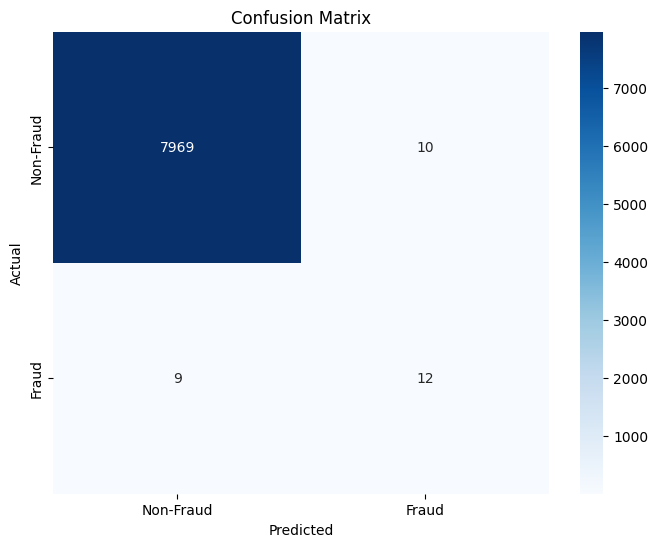

In [61]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

FRAUDFIGHTER = NearestCentroid()

FRAUDFIGHTER.fit(X_train_downsampled, y_train_downsampled)

y_pred = FRAUDFIGHTER.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification_report:",report)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98      7979
           1       0.07      0.95      0.13        21

    accuracy                           0.97      8000
   macro avg       0.53      0.96      0.56      8000
weighted avg       1.00      0.97      0.98      8000



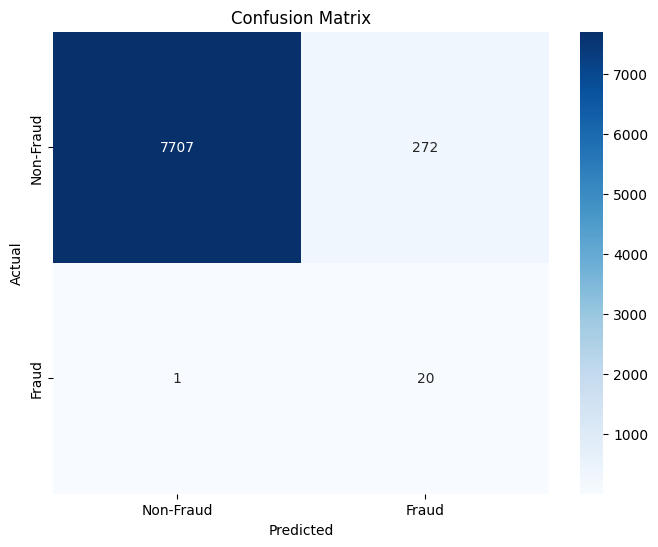

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_downsampled, y_train_downsampled)

y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:", report)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
import os, pickle
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_downsampled, y_train_downsampled) 

model_directory = "../models"
model_filename = "LogisticRegression_model.pkl"

if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_filepath = os.path.join(model_directory, model_filename)

with open(model_filepath, "wb") as file:
    pickle.dump(log_reg, file)

print(f"Model saved to {model_filepath}")

Model saved to ../models/LogisticRegression_model.pkl


Feature Importance:    Feature  Importance  Std Dev
5       V7        0.02     0.00
1       V2        0.01     0.00
2       V3        0.01     0.01
11     V14        0.01     0.01
10     V12        0.01     0.01
3       V4        0.00     0.00
8      V10        0.00     0.00
9      V11        0.00     0.00
7       V9        0.00     0.00
6       V8       -0.00     0.01
12     V16       -0.00     0.01
0       V1       -0.02     0.02
13     V17       -0.02     0.00
4       V5       -0.03     0.01
14     V18       -0.03     0.00


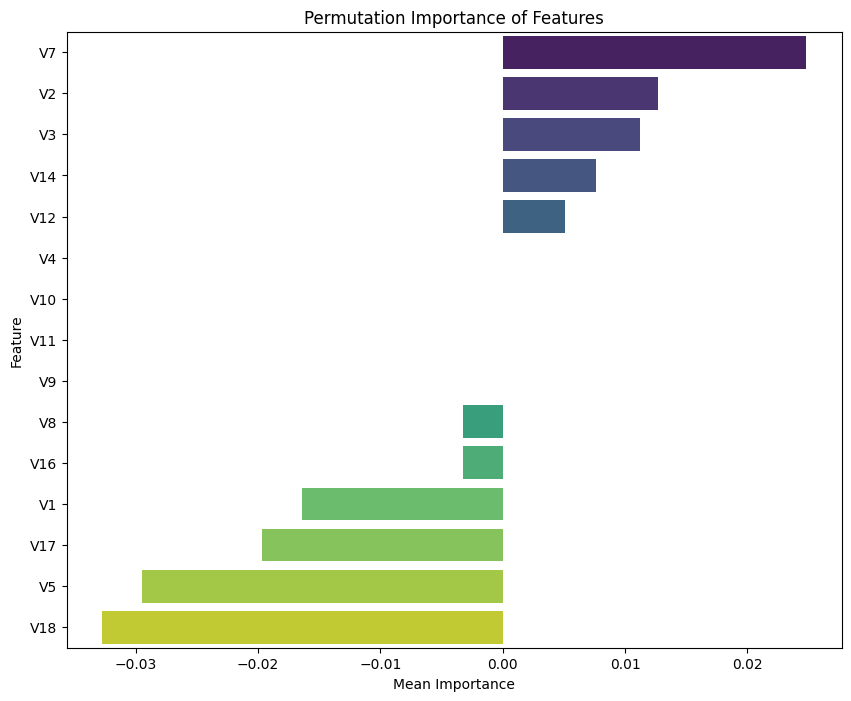

In [68]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 42, scoring = 'f1')

importance = result.importances_mean
std = result.importances_std

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance' : importance,
    'Std Dev' : std
}).sort_values(by="Importance",ascending = False)

print("Feature Importance:",importance_df)

plt.figure(figsize=(10,8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.title("Permutation Importance of Features")
plt.show()